## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [3]:
df = pd.read_csv("garments_worker_productivity.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

Here date has been taken as object type.
We will use parse_date in the read_csv method to read the date column as datetime64[ns]

In [147]:
df = pd.read_csv("garments_worker_productivity.csv", parse_dates=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

## Checking and filling for Null Values

In [148]:
# Checking for duplicates
df.duplicated().sum()

0

In [149]:
# Checking for Null values
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

<AxesSubplot:>

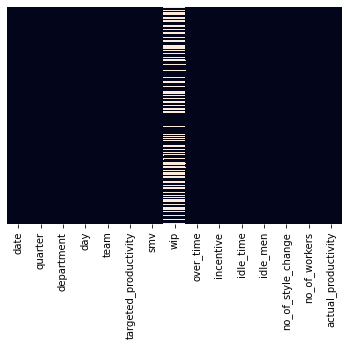

In [150]:
# visualising Null values
sns.heatmap(data = df.isnull(), yticklabels= False, cbar = False)

Now we will try to fill the null values in wip based on the average value of each department

In [151]:
# fixing the error in department
df['department'] = df['department'].apply(lambda x: 'finishing' if x == 
                                          ('finishing ' or 'finishing' ) else 'sewing')

In [152]:
# checking groupwise mean for different departments for wip values
df.groupby(df.department).mean()['wip']

department
finishing            NaN
sewing       1190.465991
Name: wip, dtype: float64

In [153]:
# checking count of each department
df.department.value_counts()

sewing       940
finishing    257
Name: department, dtype: int64

In [154]:
df[df.department == 'finishing'].head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,2015-01-01,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,2015-01-01,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,2015-01-01,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,2015-01-01,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056


As we can see, wip for finishing department is fully empty

Hence we can fill the NA values in wip according to the mean of each quarter

In [155]:
df.quarter.unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [156]:
df.groupby('quarter').mean()['wip']

quarter
Quarter1    1580.000000
Quarter2     938.425532
Quarter3    1029.728682
Quarter4    1091.178571
Quarter5    1182.956522
Name: wip, dtype: float64

In [157]:
# making a function to fill the NULL values of wip

def fillNAwip(col):
    wip = col[0]
    quarter = col[1]
    
    if pd.isnull(wip):
        if quarter == 'Quarter1':
            wip = 1580
        elif quarter == 'Quarter2':
            wip = 938
        elif quarter == 'Quarter3':
            wip = 1029
        elif quarter == 'Quarter4':
            wip = 1091
        else:
            wip = 1182
            
    return wip

In [158]:
# filling null in wip using the above function
df['wip'] = df[['wip', 'quarter']].apply(fillNAwip, axis = 1)

In [159]:
# Checking for Null values
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [160]:
# checking the department mean value for wip
df.groupby(df.department).mean()['wip']

department
finishing    1196.241245
sewing       1185.620213
Name: wip, dtype: float64

Now there are no null values in the wip column

## Analysing Categorical and Numerical features

In [161]:
# Categorical features
df.describe(include = ['O'])

,quarter,department,day
count,1197,1197,1197
unique,5,2,6
top,Quarter1,sewing,Wednesday
freq,360,940,208


In [20]:
# checking for unique values in categorical features

cat = df.select_dtypes(include = 'object')
for c in cat.columns:
    print(f'{c}')
    print(cat[c].unique())
    print()

quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']

department
['sewing' 'finishing']

day
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']



In [162]:
# Numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,1197.0,1187.900585,1406.137563,7.000000,938.000000,1066.000000,1283.000000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


## Feature Selection

We will be using Sequential feature selector

In [163]:
# dropping date column since it is of no use
df.drop('date', axis = 1, inplace = True)
df2 = df.copy()

In [164]:
# encoding the categorical features into dummy variables
df2 = pd.get_dummies(df2, drop_first=True)

In [165]:
df2.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_sewing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,...,0,0,0,0,1,0,0,1,0,0
1,1,0.75,3.94,1580.0,960,0,0.0,0,0,8.0,...,0,0,0,0,0,0,0,1,0,0
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,0,0,0,0,1,0,0,1,0,0
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,0,0,0,0,1,0,0,1,0,0
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,...,0,0,0,0,1,0,0,1,0,0


<AxesSubplot:>

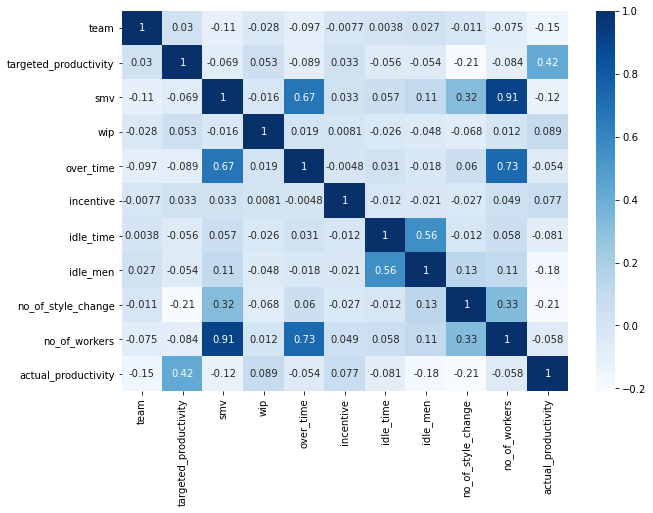

In [25]:
# checking the correlation among the variables
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")

In [166]:
# Selecting Important features using Sequential feature Selector
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
X = df2.drop('actual_productivity', axis = 1)
y = df2['actual_productivity']

# columns/features of the dataset
features = X.columns

In [167]:
# make the feature object and then fit the data to it
sfs = SequentialFeatureSelector(reg, n_features_to_select=7, direction='backward')
sfs.fit(X, y)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=7)

In [168]:
# Get the selected features
features[sfs.get_support()]

Index(['team', 'targeted_productivity', 'smv', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'department_sewing'],
      dtype='object')

In [33]:
# now we can transform X to be only the selected features with .tranform() method
X_selected = sfs.transform(X)

In [170]:
# create a dataframe for feature scaling on the independant variable and train test split
X_selected = pd.DataFrame(data = X_selected, columns = features[sfs.get_support()])

In [171]:
X_selected.head()

,team,targeted_productivity,smv,idle_men,no_of_style_change,no_of_workers,department_sewing
0,8.0,0.80,26.16,0.0,0.0,59.0,1.0
1,1.0,0.75,3.94,0.0,0.0,8.0,0.0
2,11.0,0.80,11.41,0.0,0.0,30.5,1.0
3,12.0,0.80,11.41,0.0,0.0,30.5,1.0
4,6.0,0.80,25.90,0.0,0.0,56.0,1.0


In [36]:
y

0       0.940725
1       0.886500
2       0.800570
3       0.800570
4       0.800382
          ...   
1192    0.628333
1193    0.625625
1194    0.625625
1195    0.505889
1196    0.394722
Name: actual_productivity, Length: 1197, dtype: float64

Now we will train the model with this X_selected and y

## Feature Scaling

In [172]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.3, random_state = 101)

In [173]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, :6] = sc.fit_transform(X_train.iloc[:, :6])
X_test.iloc[:, :6] = sc.transform(X_test.iloc[:, :6])

In [174]:
X_train.head()

,team,targeted_productivity,smv,idle_men,no_of_style_change,no_of_workers,department_sewing
475,-0.445122,-2.363292,0.558322,-0.12712,-0.355451,1.084278,1.0
9,-1.607579,0.208710,1.232953,-0.12712,-0.355451,1.061775,1.0
180,-0.154508,0.723111,-0.309723,-0.12712,-0.355451,-0.153410,1.0
306,-0.735737,-0.305690,0.718419,-0.12712,-0.355451,1.016768,1.0
1119,0.717335,0.208710,0.373237,-0.12712,-0.355451,0.814237,1.0


In [119]:
X_test.head()

,team,targeted_productivity,smv,idle_men,no_of_style_change,no_of_workers,department_sewing
980,-0.735737,-2.363292,1.101543,-0.12712,4.221669,1.084278,1.0
99,1.007949,0.208710,1.232953,-0.12712,-0.355451,1.106782,1.0
740,-0.735737,-0.305690,1.419888,-0.12712,1.933109,1.129285,1.0
1138,-0.735737,0.208710,-1.001012,-0.12712,-0.355451,-1.166065,1.0
595,0.136106,-0.305690,0.879443,-0.12712,-0.355451,0.994265,1.0


## Model Training and Evaluation

In [184]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [185]:
pd.DataFrame(X_train)

,team,targeted_productivity,smv,idle_men,no_of_style_change,no_of_workers,department_sewing
475,-0.445122,-2.363292,0.558322,-0.12712,-0.355451,1.084278,1.0
9,-1.607579,0.208710,1.232953,-0.12712,-0.355451,1.061775,1.0
180,-0.154508,0.723111,-0.309723,-0.12712,-0.355451,-0.153410,1.0
306,-0.735737,-0.305690,0.718419,-0.12712,-0.355451,1.016768,1.0
1119,0.717335,0.208710,0.373237,-0.12712,-0.355451,0.814237,1.0
...,...,...,...,...,...,...,...
575,-1.607579,0.208710,-1.001012,-0.12712,-0.355451,-0.670989,0.0
973,0.717335,0.208710,0.373237,-0.12712,1.933109,0.814237,1.0
75,-0.735737,0.723111,1.232953,-0.12712,-0.355451,1.061775,1.0
599,-1.316965,0.723111,0.718419,-0.12712,-0.355451,1.061775,1.0


## Evaluating Model Performance

In [186]:
predictions = reg.predict(poly_reg.fit_transform(X_test))

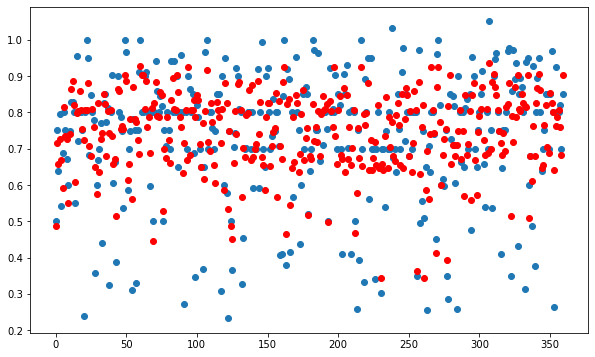

In [187]:
plt.figure(figsize = (10, 6))
plt.scatter(np.arange(0, len(y_test)), y_test)
plt.scatter(np.arange(0, len(predictions)), predictions, color = 'red')

In [188]:
# plotting the predicted results and the actual results
pred_df = pd.concat([pd.DataFrame(predictions), pd.DataFrame(y_test)], axis=1)
pred_df.columns = ['pred', 'actual']
pred_df['error'] = (pred_df['actual'] - pred_df['pred']) ** 2

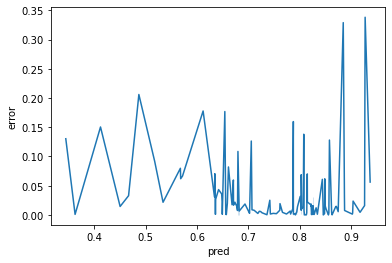

In [189]:
sns.lineplot(data=pred_df, x='pred', y='error');

(-0.75, 0.75)

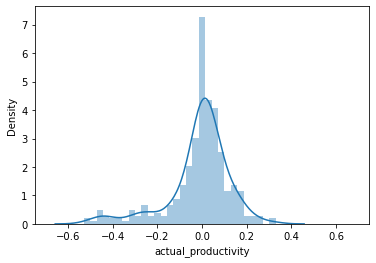

In [193]:
# plotting the distribution of residual error
sns.distplot(y_test - predictions)
plt.xlim(-.75,.75)

## Evaluation Metrics

In [192]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(predictions, y_test)
AdjR2 = 1-(1-R2)*(1197-1)/(1197-7-1)

print('MAE   = ', MAE)
print('MSE   = ', MSE)
print('RMSE  = ', RMSE)
print('R2    =', R2 )
print('AdjR2 =', AdjR2)

MAE   =  0.09156059650459737
MSE   =  0.01933025663839449
RMSE  =  0.13903329327321026
R2    = -0.5969090904583201
AdjR2 = -0.606310573749496
